# **Experiment**: full algorithm of concent from smudged ground truth 4.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC3.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC3.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [2]:
# Experiment parameters
vol_smudge = 10
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 2 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 2048 # 5000  # [512, 1024, 2048, 4096, 8192]

# tau1 = 5e-9
# tau2 = 1e-1 * tau1
# tau2 = 1e-9 * tau1
# tau2 = 1e-1 * tau1 / (129**4)
J0 = 6

# durations
# SNR16_L129_N8192_J6_r2_sX_i3 -> 10h
# SNR16_L129_N8192_J6_r1_sX_i3 -> 1.5h
# SNR16_L129_N2048_J6_r2_sX_i5 -> per iter: 1h data_discr/2min rest | tot: 5h20m
max_iter = 1

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter))
# exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}_t{}_tt{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter, int(-np.log(tau1)/np.log(10)), int(-np.log(tau2)/np.log(10)) ))
exp.dbglevel(4)

2022-03-02 14:00:05,996 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC3_22-03-02_14-00-05_SNR16_L129_N2048_J6_r2_s10_i1


In [3]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
results_dir = "results"
results_folder = "expC3_22-03-01_22-57-37_SNR16_L129_N2048_J6_r2_s10_i10"
results_path = os.path.join("..", "..", "..", "..",results_dir,results_folder)

In [4]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
#                tau1=None, # tau1,
#                tau2=None, # tau2,
               J0=J0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-03-02 13:22:13,108 INFO Start Experiment
2022-03-02 13:22:13,110 INFO Running Experiment for SNR = 0.0625 and 2048 images
2022-03-02 13:22:13,112 INFO This experiment illustrates orientation refinement using a lifting approach
2022-03-02 13:22:13,114 INFO Initialize simulation object and CTF filters.
2022-03-02 13:22:13,116 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2022-03-02 13:22:14,184 INFO Use downsampled map to creat simulation object.
2022-03-02 13:22:14,221 INFO Get true rotation angles generated randomly by the simulation object.
2022-03-02 13:22:17,771 INFO Trying NFFT backend finufft
2022-03-02 13:22:17,798 INFO NFFT backend finufft usable.
2022-03-02 13:22:17,799 INFO Trying NFFT backend cufinufft
2022-03-02 13:22:17,802 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2022-03-02 13:22:17,803 INFO Trying NFFT backend pynfft
2022-03-02 13:22:17,806 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2022-03-02

2022-03-02 13:31:22,699 INFO Computing 50 means of 314 points in at most 20 steps...
2022-03-02 13:31:22,783 INFO Computing 2048 means at 29%
2022-03-02 13:31:22,795 INFO Computing 50 means of 325 points in at most 20 steps...
2022-03-02 13:31:22,880 INFO Computing 2048 means at 31%
2022-03-02 13:31:22,894 INFO Computing 50 means of 312 points in at most 20 steps...
2022-03-02 13:31:22,975 INFO Computing 2048 means at 34%
2022-03-02 13:31:22,988 INFO Computing 50 means of 314 points in at most 20 steps...
2022-03-02 13:31:23,073 INFO Computing 2048 means at 36%
2022-03-02 13:31:23,085 INFO Computing 50 means of 315 points in at most 20 steps...
2022-03-02 13:31:23,166 INFO Computing 2048 means at 39%
2022-03-02 13:31:23,179 INFO Computing 50 means of 319 points in at most 20 steps...
2022-03-02 13:31:23,261 INFO Computing 2048 means at 41%
2022-03-02 13:31:23,274 INFO Computing 50 means of 316 points in at most 20 steps...
2022-03-02 13:31:23,358 INFO Computing 2048 means at 43%
2022-0

2022-03-02 14:00:06,573 INFO Start Postprocessing
2022-03-02 14:00:06,574 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.9999999999968168
2022-03-02 14:00:44,256 INFO MSE deviation of the 1:th estimated GD-refined rotations using register_rotations : 0.17767899294475661


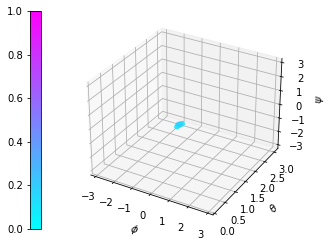

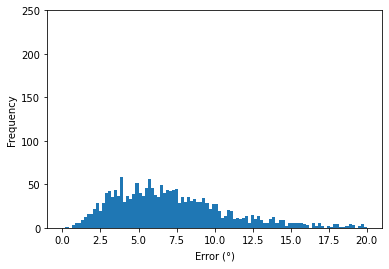

integrated (averaged) density = 0.9999999999999716
2022-03-02 14:00:45,973 INFO MSE deviation of the 2:th estimated GD-refined rotations using register_rotations : 0.011052167528243083


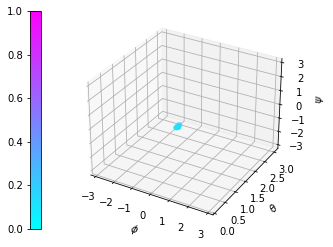

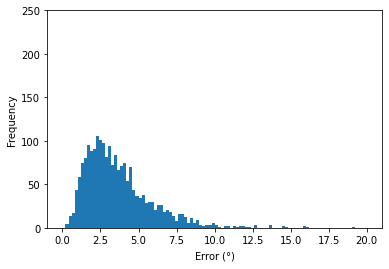

integrated (averaged) density = 0.9999999999999574
2022-03-02 14:00:47,631 INFO MSE deviation of the 3:th estimated GD-refined rotations using register_rotations : 0.004667603819658299


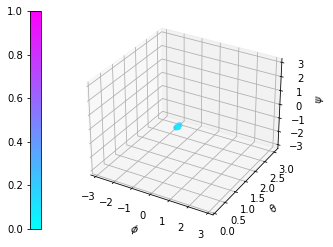

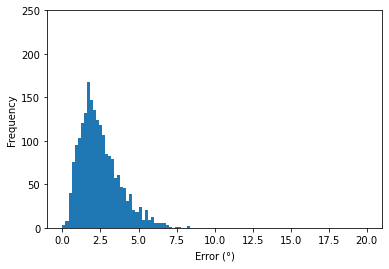

integrated (averaged) density = 0.9999999999999574
2022-03-02 14:00:49,444 INFO MSE deviation of the 4:th estimated GD-refined rotations using register_rotations : 0.003164497921546965


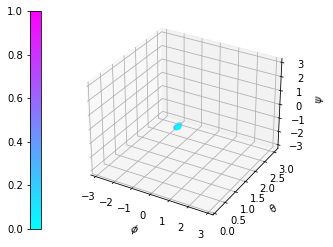

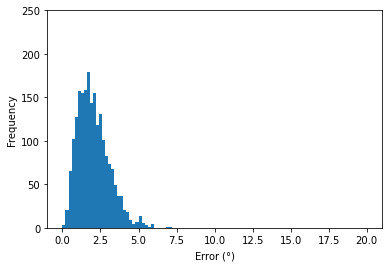

integrated (averaged) density = 0.9999999999999574
2022-03-02 14:00:51,017 INFO MSE deviation of the 5:th estimated GD-refined rotations using register_rotations : 0.0027323694234138605


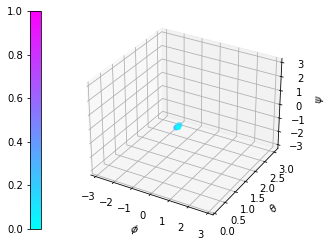

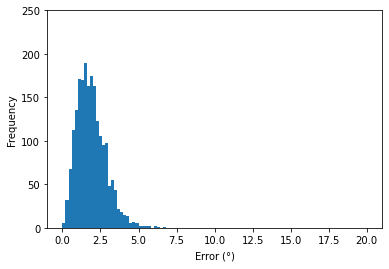

integrated (averaged) density = 0.9999999999999787
2022-03-02 14:00:52,563 INFO MSE deviation of the 6:th estimated GD-refined rotations using register_rotations : 0.002596077478612035


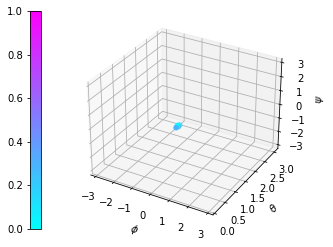

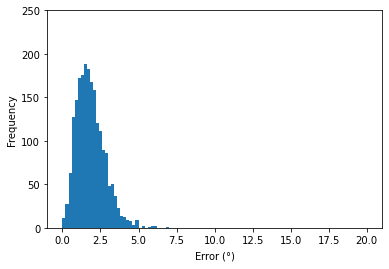

integrated (averaged) density = 1.0000000000000213
2022-03-02 14:00:54,472 INFO MSE deviation of the 7:th estimated GD-refined rotations using register_rotations : 0.0025564149111011692


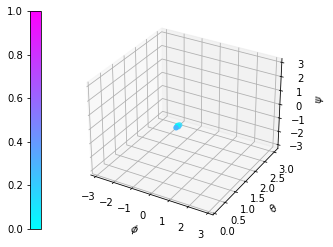

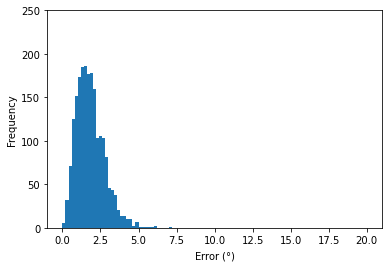

integrated (averaged) density = 0.9999999999999929
2022-03-02 14:00:56,242 INFO MSE deviation of the 8:th estimated GD-refined rotations using register_rotations : 0.0025471689135917763


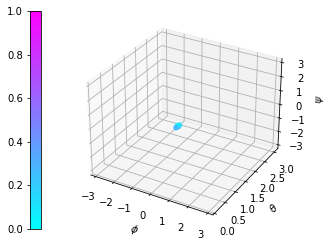

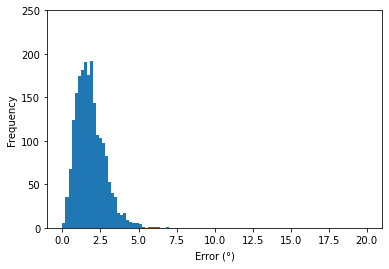

integrated (averaged) density = 1.0000000000000213
2022-03-02 14:00:57,867 INFO MSE deviation of the 9:th estimated GD-refined rotations using register_rotations : 0.002547505473197306


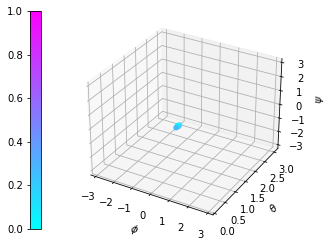

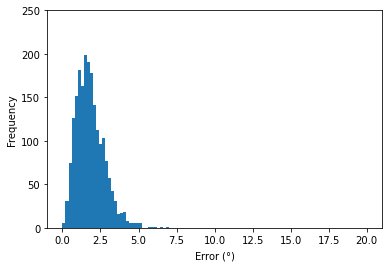

integrated (averaged) density = 1.000000000000071
2022-03-02 14:00:59,749 INFO MSE deviation of the 10:th estimated GD-refined rotations using register_rotations : 0.0025503908088729686


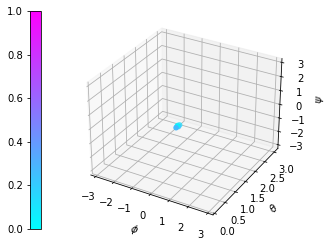

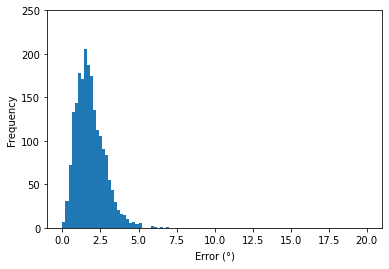

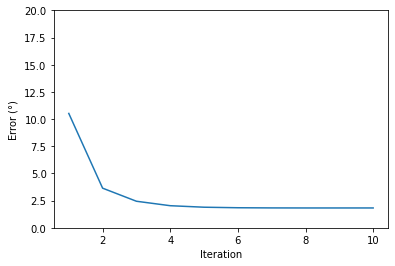

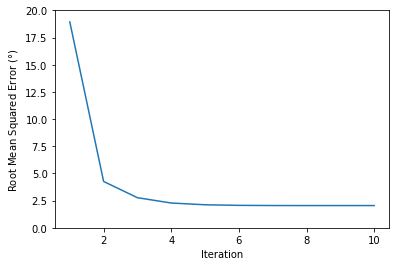

In [4]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
                mr_repeat=mr_repeat,
                hist_drange=20,
                hist_vrange=250,
                results_folder=results_path #?
                )
